### 1. Código de Replicação de Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings de Bolukbasi et. al
Acesse o artigo [aqui](https://arxiv.org/pdf/1607.06520.pdf) e o código original disponível no [GitHub](https://github.com/tolga-b/debiaswe).

#### 1.1 Download do modelo de Hartmann et. al do artigo Portuguese Word Embeddings: Evaluating on Word Analogies and Natural Language Tasks
Acesse o [artigo](https://aclanthology.org/W17-6615.pdf) para acessar o repositórios dos modelos e realizar o download.\
Modelo utilizado: GLOVE 300 dimensões.

In [ ]:
class WordEmbedding:
    # código de Bolukbasi aqui 

In [ ]:
E =  WordEmbedding('modelo_glove_300_de_hartmann.txt')

In [ ]:
# Direção do Gênero
v_gender_shehe = E.diff('ela', 'ele')

# Geração das 500 melhores analogias em grupos de 10,20,30,40 e 50 mil palavras
a_gender_shehe_10k = E.best_analogies_dist_thresh(v_gender_shehe, thresh=1, topn=500, max_words=10000)
a_gender_shehe_20k = E.best_analogies_dist_thresh(v_gender_shehe, thresh=1, topn=500, max_words=20000)
a_gender_shehe_30k = E.best_analogies_dist_thresh(v_gender_shehe, thresh=1, topn=500, max_words=30000)
a_gender_shehe_40k = E.best_analogies_dist_thresh(v_gender_shehe, thresh=1, topn=500, max_words=40000)
a_gender_shehe_50k = E.best_analogies_dist_thresh(v_gender_shehe, thresh=1, topn=500, max_words=50000)


In [ ]:
# Pares de profissões disponível em profissoes_pares.txt
profissoes_pair = []

In [ ]:
# Listagem das similaridades entre "ele"-"profissao" e "ela"-"profissao" conforme flexão apropriada
shehe_pairs = sorted([((E.v(h).dot(E.v("ele")), h), (E.v(m).dot(E.v("ela")), m)) for m, h in profissoes_pair])

In [1]:
# embeddings femininos e a proporção corresponde do % de mulheres no mercado de trabalho
profissao_corr = [
(95,0.108526246),(95,0.108467592),(95,0.15569737),(95,-0.099081296),(95,0.011140956),(88,0.14938001),
(88,-0.01705938),(88,0.15065681),(88,0.105574714),(88,0.055059024),(95,0.120921262),(95,0.055028191),
(95,0.054833283),(95,0.069994022),(21.1,-0.00420581),(21.1,-0.064437877),(21.1,-0.080471654),(21.1,-0.177329864),
(21.1,-0.122772494),(11,0.06566812),(11,0.091364175),(46.5,-0.01446635),(46.5,0.11612636),(46.5,-0.05211959),
(64.5,0.10778907),(64.5,-0.053515087),(64.5,-0.05555831),(64.5,0.034039932),(64.5,0.01337443),(64.5,-0.0364022594),
(64.5,0.06208235),(40,-0.07291305),(40,-0.014321609),(40,0.01869107),(40,0.10907316),(40,0.035248574),
(9.4,0.057198954),(9.4,-0.0446804),(9.4,-0.20864739),(9.4,-0.13990095),(9.4,-0.0538897025),(21.5,-0.30199644),
(14.8,-0.00674838999999999),(14.8,-0.076670895),(14.8,-0.195776249),(13.8,-0.0661135),(13.8,-0.16307149),(13.8,-0.045094067),
(13.8,-0.062460117),(13.8,-0.288624138),(13.8,-0.021597635),(62.9,0.0358387),(62.9,0.0352611),(62.9,0.062448686),
(62.9,0.08848435),(62.9,-0.066014343),(70.4,0.094114006),(70.4,-0.045835816),(70.4,-0.149525374),(70.4,-0.10785352),
(70.4,0.10017933),(70.4,0.064249324),(53,-0.022474197),(53,0.123842127),(53,-0.064935488),(53,0.22419436),
(53,-0.02503422),(53,0.164500026),(53,0.02118954),(50.1,0.128644845),(50.1,-0.03716485),(50.1,-0.16684613),
(50.1,-0.06946516),(41.8,-0.03046897),(41.8,-0.05224564),(41.8,-0.08942163),(41.8,-0.12161624),(41.8,-0.03535505),
(41.8,-0.06204877),(13.2,-0.31247741),(13.2,-0.06923157),(13.2,-0.058661049),(13.2,-0.101334494),(13.2,-0.348375455),
(13.2,-0.08197012),(13.2,-0.13696272),(13.2,-0.11434712),(13.2,-0.10490455),(53.7,-0.08814512),(53.7,-0.02337788),
(53.7,-0.148911653),(13.51,-0.11595754),(11.57,-0.11982072),(14.8,-0.01872995),(17.28,-0.13363484),(85,0.25913265),
(13.3,-0.100291147),(46.6,-0.03692203),(65,-0.03534067),(58,0.02837565),(58,0.02891368),(58,-0.01479686),
(77.1,0.114573174),(68.2,-0.01828617),(66.9,-0.013631725),(1.4,-0.28207055),(94.1,0.090798282),(76.8,-45157651.9082126),
(67.5,0.00549292000000001),(8.6,-0.247753284)
]

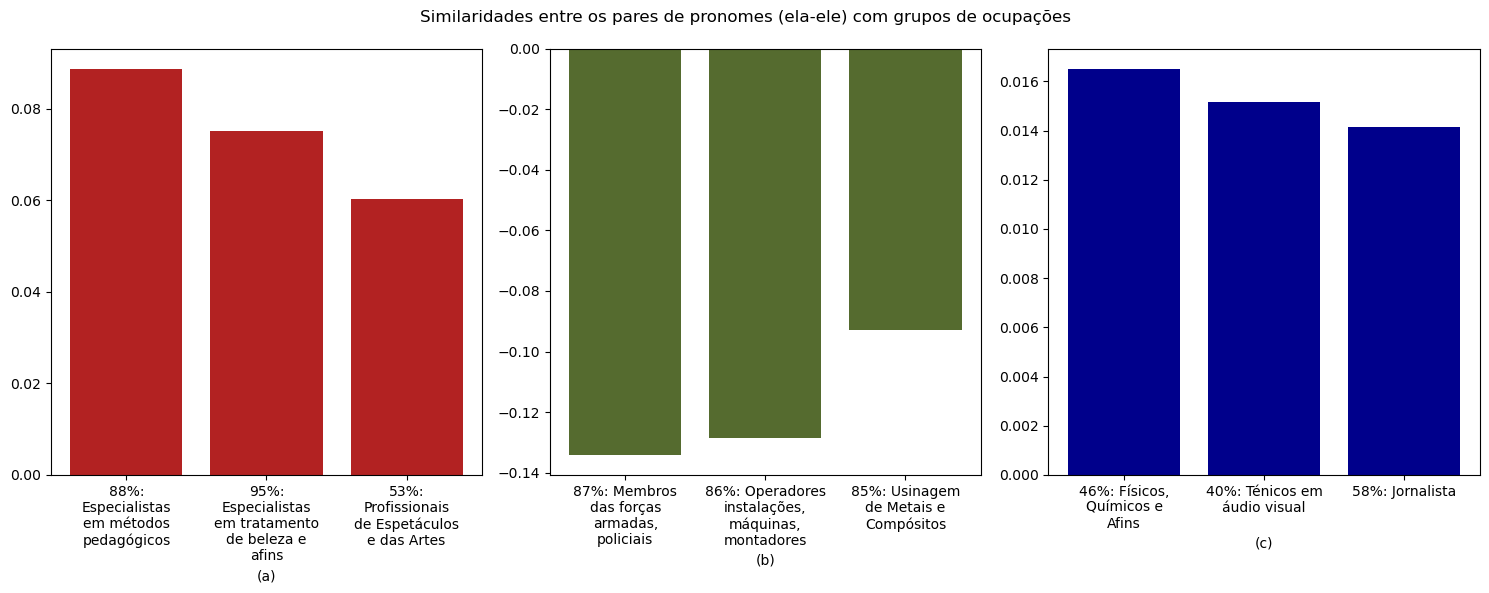

In [1]:
# Geração do gráfico de grupo de profissões e o valor médio dos embeddings de palavras das profissões por grupo

import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Similaridades entre os pares de pronomes (ela-ele) com grupos de ocupações')

data1 = {
    "88%: Especialistas em métodos pedagógicos": 0.0887222356,
    "95%: Especialistas em tratamento de beleza e afins": 0.0751941895,
    "53%: Profissionais de Espetáculos e das Artes": 0.060183164,
}
data2 = {
    "87%: Membros das forças armadas, policiais": -0.1340276889,
    "86%: Operadores instalações, máquinas, montadores": -0.1285198784,
    "85%: Usinagem de Metais e Compósitos": -0.09306518,
}

data3 = {
    "46%: Físicos, Químicos e Afins": 0.01651347333,
    "40%: Ténicos em áudio visual": 0.015155629,
    "58%: Jornalista": 0.01416415667,
}
labels = ['\n'.join(wrap(x, 15)) for x in  list(data1.keys())]
labels2 = ['\n'.join(wrap(x, 15)) for x in  list(data2.keys())]
labels3 = ['\n'.join(wrap(x, 15)) for x in  list(data3.keys())]

ax1.bar(labels, list(data1.values()), color="firebrick")
ax1.set_xlabel("(a)")
ax2.bar(labels2, list(data2.values()), color="darkolivegreen")
ax2.set_xlabel("(b)")
ax3.bar(labels3, list(data3.values()), color="darkblue")
ax3.set_xlabel("(c)")


plt.tight_layout()
plt.show()
fig.savefig("similaridade3", dpi=600)